Name: Ozan Müjde

ID: 181101050

Course: BIL470

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


import random


%matplotlib inline 
from dt import DecisionTreeClassifier

In [3]:
data = pd.read_csv('Iris.csv')
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
data = data.drop(columns = ["Id"])
data.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
# to display stats about data
data.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [6]:
# basic infos about data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# to display number of samples on each class
data['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# Is there any missing value
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

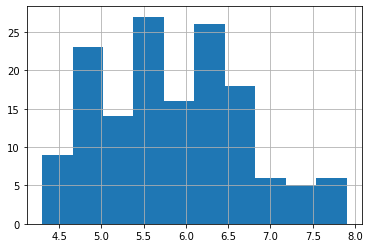

In [9]:
# histograms
data['SepalLengthCm'].hist()

<AxesSubplot:>

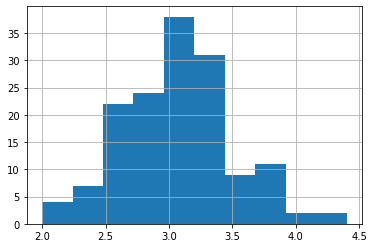

In [10]:
data['SepalWidthCm'].hist()

<AxesSubplot:>

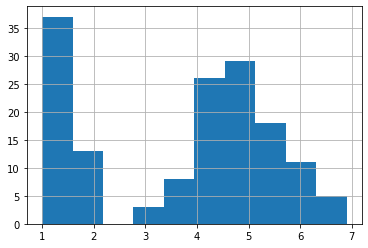

In [11]:
data['PetalLengthCm'].hist()

<AxesSubplot:>

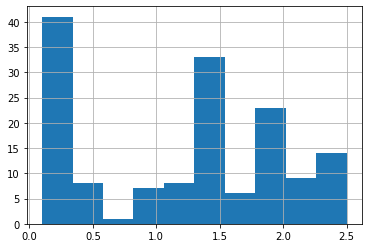

In [12]:
data['PetalWidthCm'].hist()

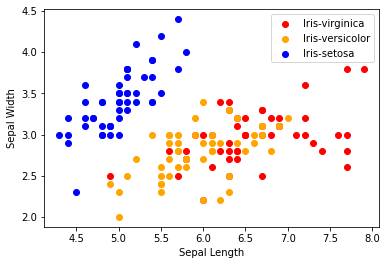

In [13]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

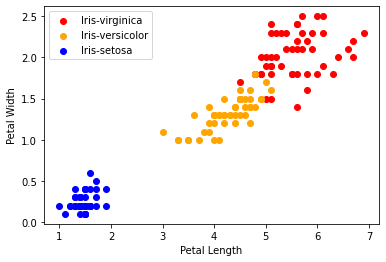

In [14]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

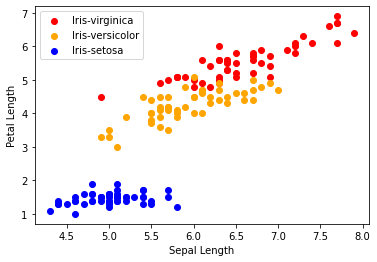

In [15]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

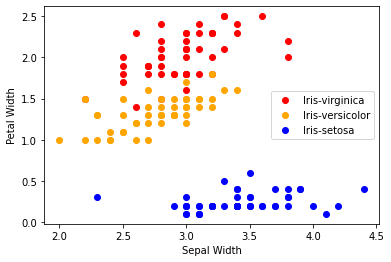

In [16]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [17]:
data.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

<AxesSubplot:>

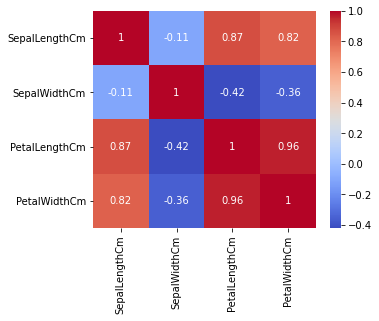

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

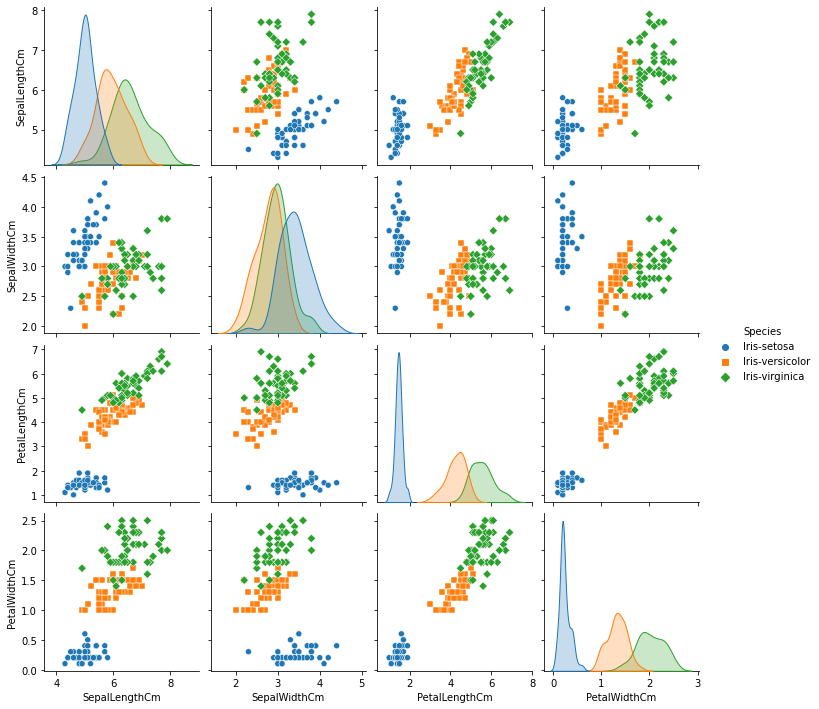

In [19]:
sns.pairplot(data, hue = 'Species', markers=["o", "s", "D"])

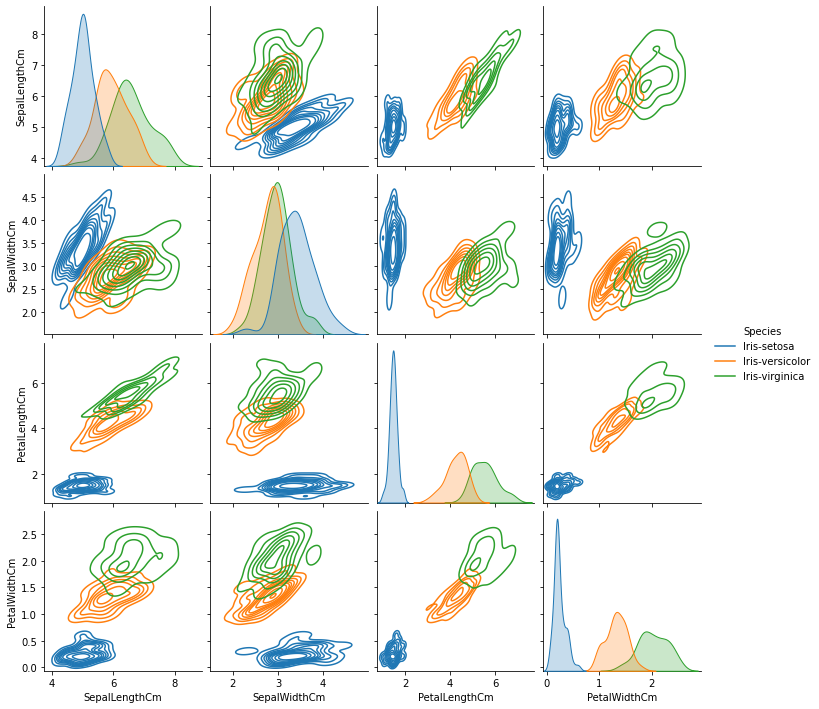

In [20]:
kde_graph = sns.pairplot(data, hue = 'Species', kind='kde')


# Exploratory Data Analysis (EDA)

 * Read Dataset
 * Perform EDA

# Train the classifier

Burada 120 ve 30 eleman kullanarak agaclari bastim. Ekstra olarak agaclarin genel dogruluklarinida elle hesaplayip basmak istedim daha sonradan biri bunlari göstermek icin sklearn kullanabilir miyiz diye sormus ama onu gorene kadar bunu yapmistim koymak istedim -Genelde test 28-30 arası buluyor-

In [21]:
inputArray = data.values.tolist()
random.shuffle(inputArray)
dtc = DecisionTreeClassifier(max_depth=5,data =inputArray)
X_train, X_test, Y_test, test_data, X_,Y_Train,test = dtc.split_data()
print("------------Tree with 120 element------------")
trainNode , trainList = dtc.fit(X_train,Y_Train)

------------Tree with 120 element------------
120
Petal Width is <= 0.6 gini= 0.6648611111111111 samples= 120
--> True:
 [41, 0, 0]
--> False:
 Petal Width is <= 1.7 gini= 0.496074347059766 samples= 79
 --> True:
  Petal Length is <= 4.9 gini= 0.1587901701323253 samples= 46
  --> True:
   Petal Width is <= 1.6 gini= 0.04759071980963721 samples= 41
   --> True:
    [0, 40, 0]
   --> False:
    [0, 0, 1]
  --> False:
   Petal Width is <= 1.5 gini= 0.48 samples= 5
   --> True:
    [0, 0, 3]
   --> False:
    [0, 2, 0]
 --> False:
  Petal Length is <= 4.8 gini= 0.058769513314967714 samples= 33
  --> True:
   Sepal Width is <= 3.0 gini= 0.4444444444444444 samples= 3
   --> True:
    [0, 0, 2]
   --> False:
    [0, 1, 0]
  --> False:
   [0, 0, 30]


In [22]:
print("------------Accuracy with 120 element------------")
trainPredict = dtc.predict(trainList,trainNode)
print("------------Accuracy with 30 element------------")
predicted_test = dtc.predict(test_data,trainNode)


------------Accuracy with 120 element------------
Correct Labels: 120 Accuracy is: 100.0
------------Accuracy with 30 element------------
Correct Labels: 29 Accuracy is: 96.66666666666667


```python
clf = DecisionTreeClassifier(max_depth=max_depth)
```

 * train the classifier
 * calculate metrics


# Results

Confusion Matrix non-norm (Hocanınkiyle slaytındaki ile farkli)

In [23]:

yhat = dtc.yhat
trainData = dtc.trainData
print(predicted_test)
print(yhat)
print("---------CONF TEST-----------")
print(confusion_matrix(yhat, predicted_test))
print("---------CONF TRAIN-----------")
print(confusion_matrix(trainData, trainPredict))
confArr = confusion_matrix(yhat, predicted_test)
confArrTrain = confusion_matrix(trainData, trainPredict)


[2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2]
[2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2]
---------CONF TEST-----------
[[ 9  0  0]
 [ 0  7  0]
 [ 0  1 13]]
---------CONF TRAIN-----------
[[41  0  0]
 [ 0 43  0]
 [ 0  0 36]]


Hocanin verdigi 2 boyutlu gibi düsünmeye calisip 3 class icin ayri ayri yaptım ortak sadece acc hesapladim o da üstte tree nin altinda normalde de diagonal / tum array

Recall : Gerçekten x classında olanlar / X classı olarak tahmin edilenlerin tamamı

Precision : Gerçekten x classında olanlar / gerçekte X classında olup başka labellananlar  + X olup X labellananlar(X olarak labellanan her sey)

In [24]:
print("-------Precision 0 Test-------")
p0 = confArr[0][0] / (confArr[0][0] + confArr[1][0] +confArr[2][0])
print(p0)
print("--------Accuracy 0 Test ---------")
a0 = confArr[0][0] / (confArr[0][0] + confArr[0][1] + confArr[0][2] +confArr[1][0] +confArr[2][0])
print(a0)
print("--------Recall 0 Test -----------")
r0 =confArr[0][0] / (confArr[0][0] + confArr[0][1] +confArr[0][2])
print(r0)
f10= (2*p0*r0) /(p0+r0)
print("--------F1 Score 0 Test-----------")
print(f10)

-------Precision 0 Test-------
1.0
--------Accuracy 0 Test ---------
1.0
--------Recall 0 Test -----------
1.0
--------F1 Score 0 Test-----------
1.0


In [25]:
print("-------Precision 0 Train-------")
p0t = confArrTrain[0][0] / (confArrTrain[0][0] + confArrTrain[1][0] +confArrTrain[2][0])
print(p0t)
print("--------Accuracy 0 Train ---------")
a0t = confArrTrain[0][0] / (confArrTrain[0][0] + confArrTrain[0][1] + confArrTrain[0][2] +confArrTrain[1][0] +confArr[2][0])
print(a0t)
print("--------Recall 0 Train -----------")
r0t =confArrTrain[0][0] / (confArrTrain[0][0] + confArrTrain[0][1] +confArrTrain[0][2])
print(r0t)
f10t= (2*p0t*r0t) /(p0t+r0t)
print("--------F1 Score 0 Train-----------")
print(f10t)

-------Precision 0 Train-------
1.0
--------Accuracy 0 Train ---------
1.0
--------Recall 0 Train -----------
1.0
--------F1 Score 0 Train-----------
1.0


In [26]:
print("-------Precision 1 Test-------")
p1 = confArr[1][1] / (confArr[0][1] + confArr[1][1] +confArr[2][1])
print(p1)
print("--------Accuracy 1 Test---------")
a1 = confArr[1][1] / (confArr[1][1] + confArr[0][1] + confArr[2][1] +confArr[1][0] +confArr[1][2])
print(a1)
print("--------Recall 1 Test -----------")
r1 =confArr[1][1] / (confArr[1][0] + confArr[1][1] +confArr[1][2])
print(r1)
f11= (2*p1*r1) /(p1+r1)
print("--------F1 Score 1 Test-----------")
print(f11)


-------Precision 1 Test-------
0.875
--------Accuracy 1 Test---------
0.875
--------Recall 1 Test -----------
1.0
--------F1 Score 1 Test-----------
0.9333333333333333


In [27]:
print("-------Precision 1 Train-------")
p1t = confArrTrain[1][1] / (confArrTrain[0][1] + confArrTrain[1][1] +confArrTrain[2][1])
print(p1t)
print("--------Accuracy 1 Train---------")
a1t = confArrTrain[1][1] / (confArrTrain[1][1] + confArrTrain[0][1] + confArrTrain[2][1] +confArrTrain[1][0] +confArrTrain[1][2])
print(a1t)
print("--------Recall 1 Train -----------")
r1t =confArrTrain[1][1] / (confArrTrain[1][0] + confArrTrain[1][1] +confArrTrain[1][2])
print(r1t)
f11t= (2*p1t*r1t) /(p1t+r1t)
print("--------F1 Score 1 Train-----------")
print(f11t)


-------Precision 1 Train-------
1.0
--------Accuracy 1 Train---------
1.0
--------Recall 1 Train -----------
1.0
--------F1 Score 1 Train-----------
1.0


In [28]:
print("-------Precision 2 Test -------")
p2 = confArr[2][2] / (confArr[0][2] + confArr[1][2] +confArr[2][2])
print(p2)
print("--------Accuracy 2 Test ---------")
a2 = confArr[2][2] / (confArr[2][2] + confArr[0][2] + confArr[1][2] +confArr[2][0] +confArr[2][1])
print(a2)
print("--------Recall 2 Test -----------")
r2 =confArr[2][2] / (confArr[2][0] + confArr[2][1] +confArr[2][2])
print(r2)
f12= (2*p2*r2) /(p2+r2)
print("--------F1 Score 2 Test-----------")
print(f12)

-------Precision 2 Test -------
1.0
--------Accuracy 2 Test ---------
0.9285714285714286
--------Recall 2 Test -----------
0.9285714285714286
--------F1 Score 2 Test-----------
0.962962962962963


In [29]:
print("-------Precision 2 Train -------")
p2t = confArrTrain[2][2] / (confArrTrain[0][2] + confArrTrain[1][2] +confArrTrain[2][2])
print(p2t)
print("--------Accuracy 2 Train ---------")
a2t = confArrTrain[2][2] / (confArrTrain[2][2] + confArrTrain[0][2] + confArrTrain[1][2] +confArrTrain[2][0] +confArrTrain[2][1])
print(a2t)
print("--------Recall 2 Train -----------")
r2t =confArrTrain[2][2] / (confArrTrain[2][0] + confArrTrain[2][1] +confArrTrain[2][2])
print(r2t)
f12t= (2*p2t*r2t) /(p2t+r2t)
print("--------F1 Score 2 Train-----------")
print(f12t)

-------Precision 2 Train -------
1.0
--------Accuracy 2 Train ---------
1.0
--------Recall 2 Train -----------
1.0
--------F1 Score 2 Train-----------
1.0


Normalized Confusion Matrix 

In [30]:
normConfArr = []
for number in confArr:
    normConfArr.append(number / 30)
print(normConfArr[0])
print(normConfArr[1])
print(normConfArr[2])

[0.3 0.  0. ]
[0.         0.23333333 0.        ]
[0.         0.03333333 0.43333333]


In [31]:
normConfArrTrain = []
for number in confArrTrain:
    normConfArrTrain.append(number / 120)
print(normConfArrTrain[0])
print(normConfArrTrain[1])
print(normConfArrTrain[2])

[0.34166667 0.         0.        ]
[0.         0.35833333 0.        ]
[0.  0.  0.3]


 * Plot metrics
 * Output a confusion matrix

ROC CURVE (sklearn doc dan aldim <https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html>) Datayı önceden binarize edip 2d roc gibi bir kaç kez yapıyoruz

In [32]:

yhat = label_binarize(yhat, classes=[0, 1, 2])
trainData = label_binarize(trainData, classes=[0, 1, 2])
predicted_test = label_binarize(predicted_test, classes=[0, 1, 2])
trainPredict = label_binarize(trainPredict, classes=[0, 1, 2])
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = yhat.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(yhat[:, i], predicted_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fprtr = dict()
tprtr = dict()
roc_auctr = dict()
for i in range(n_classes):
    fprtr[i], tprtr[i], _ = roc_curve(trainData[:, i], trainPredict[:, i])
    roc_auctr[i] = auc(fprtr[i], tprtr[i])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
all_fprtr = np.unique(np.concatenate([fprtr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
mean_tprtr = np.zeros_like(all_fprtr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tprtr += interp(all_fprtr, fprtr[i], tprtr[i])
mean_tpr /= n_classes
mean_tprtr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
fprtr["macro"] = all_fprtr
tprtr["macro"] = mean_tprtr
roc_auctr["macro"] = auc(fprtr["macro"], tprtr["macro"])


<ipython-input-32-d9a141233edc>:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-32-d9a141233edc>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tprtr += interp(all_fprtr, fprtr[i], tprtr[i])


ROC FOR TEST

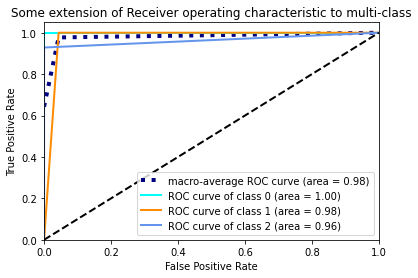

In [33]:
lw = 2
plt.figure()
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ROC FOR TRAIN

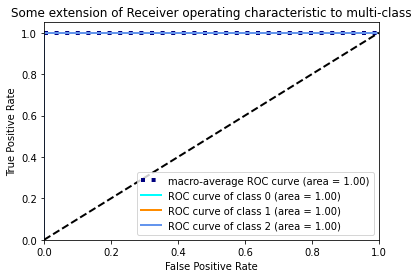

In [34]:
plt.figure()
plt.plot(fprtr["macro"], tprtr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auctr["macro"]),
         color='navy', linestyle=':', linewidth=4)
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fprtr[i], tprtr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auctr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

area under the ROC curve (AUC) For Test

In [35]:
macro_roc_auc_ovo = roc_auc_score(yhat, predicted_test, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(yhat, predicted_test, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(yhat,predicted_test, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(yhat, predicted_test, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.980849 (macro),
0.978261 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.980849 (macro),
0.978261 (weighted by prevalence)


area under the ROC curve (AUC) For Trainm

In [36]:
macro_roc_auc_ovo = roc_auc_score(trainData, trainPredict, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(trainData, trainPredict, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(trainData,trainPredict, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(trainData, trainPredict, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)
